<a href="https://colab.research.google.com/github/Tia8099/Lesson-1/blob/main/Lesson_(11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting

## The Power of Visualization

If you read this paragraph, you do it with your eyes. The more I write, the harder it is for you to focus all the way to the end. Sometimes, writing is the perfect medium for conveying thought. For example, I have written these notebooks in order to help you to better understand the programming that we are talking about in each class session. Sure, you don't NEED it, but I do hope they help.

Other times, though, words just don't do enough. Why are words so often insufficient?

As humans, we have developed to depend heavily on our ability to discern visual stimuli. We depend on this ability in our everyday lives. Visual stimulus prevents us from falling, guides our path, informs us of nearby dangers, and provides patterns that teach us about the world that we live in. As we analyze data, visualization allows us to take advantage of our love of SEEING in two critical ways:

- We can discern patterns in unfamiliar data
- We can present complex results in a straightforward manner

For example, I can tell you that income per capita in Finland is twice that of Uruguay, or I can show you:

The difference between the two stands out much more in the visual than it does in words. Although this is a very simple example, we can easily expand our understanding of this data as we continue to visualize it. For example, here are the top and bottom 10 countries by per capita GDP:

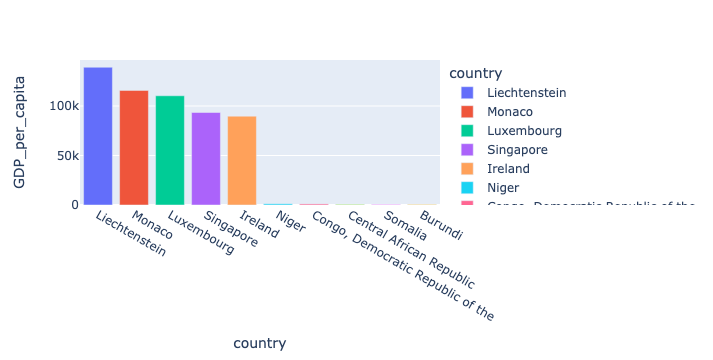

In [ ]:
# Grab top and bottom 10 rows
plotData = pd.concat([data.head(5), data.tail(5)])

# Plot the data
px.bar(plotData,x = 'country', y = 'GDP_per_capita', color='country')


That inequality is massive! We might have seen this in numbers, but it really stands out when we visualize it. Our brains are wired for visual interpretation of information, and we will see this becomes even more valuable as we move into more complex data sources. We will be able to find questions AND answers more quickly if we supplement our analysis with visualization.

In some cases, visual analysis alone may even be sufficient. Now, let's learn how to create excellent visuals in Python.

## Plotly Express and Rapid Prototyping

In order to make plotting in Python as easy as possible, several groups have worked hard to streamline the code that we need to write in order to create visuals. The end result, and the library that we will focus on throughout this course, is the Plotly Express library. It is part of the broader Plotly visualization library, and is excellent for creating highly customizable figures using Python. The Express portion of the library is focused on enabling rapid prototyping.

Rapid prototyping essentially means that we want to quickly create a minimum viable product as our starting visual. From there, we can customize and smooth over the rough edges of our figure.

To get started, we need a few things:

1. Data to analyze (best if stored in `pandas`, but not strictly required)
2. Import `plotly.express`

Let's import our libraries and some interesting data:

In [ ]:
import plotly.express as px
import pandas as pd
import requests, json

# Import data about the Women's World Cup Final match
data = pd.json_normalize(json.loads(requests.get("https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/69321.json").text))
# Choosing a few columns to keep
data = data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration',
 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id',
 'play_pattern.name', 'team.id', 'team.name', 'location', 'player.id', 'player.name', "shot.outcome.name"]]

shots = data[data['shot.outcome.name'].notnull()]


At this point, we are ready to start creating visuals. Let's look at available information on shots taken during the FIFA Women's World Cup final match. First, let's take a look at the number of shots made by each team:

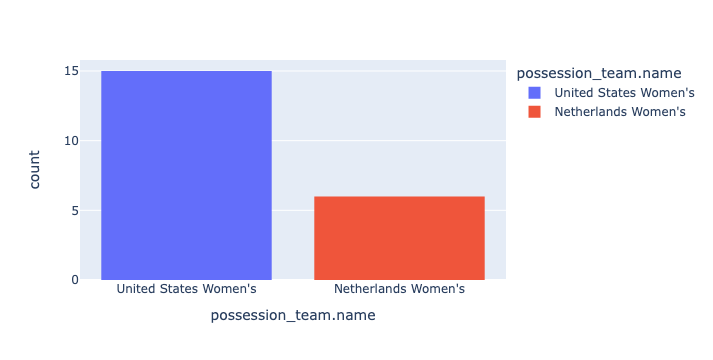

In [ ]:
# Using a histogram to total the shot count for each team
px.histogram(shots, x='possession_team.name', color='possession_team.name')


Making our first plots is very easy: we just need to call `px` (our abbreviated import name for `plotly.express`), and then state what kind of figure we want to generate. In this case, we want to make a histogram, because a histogram is a count of observations by group. To see all of the plot types that are available, follow [this link](https://plotly.com/python-api-reference/plotly.express.html).

In order to make our `px.histogram`, we provide just a few arguments:
1. the name of the Data Frame from which we want to generate our plot
2. the variable that we want to group by (indicated as the `x` variable, since it will shape the x-axis)
3. the variable that we want to use to dictate color in our figure (optional, but helpful in many cases)

After we provide our arguments, `plotly.express` does all the hard work, and puts our visual together for us. Now, we can easily see that the US outshot the Netherlands. We might want to know, though, if the US just took lots of shots that were of lower quality. We can adapt our visual to take a look:

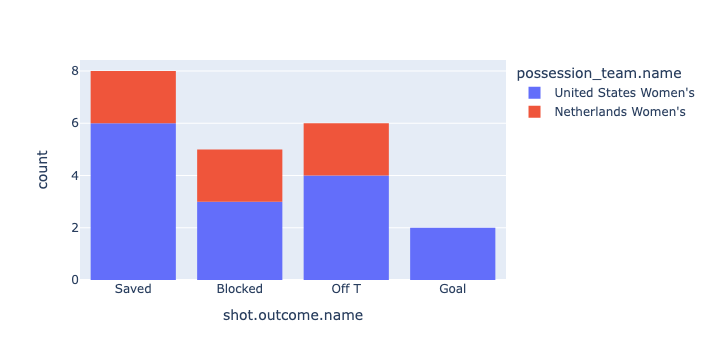

In [ ]:
# Using a histogram to see what kinds of shots each team took
px.histogram(shots, x='shot.outcome.name', color='possession_team.name')

This visual makes it clear that the US just took more shots of ALL types than did the Netherlands. In order to update our plot, we simply changed the `x` variable, so that the histogram was grouped by shot type, rather than by team. We kept the color parameter, though, in order to make it easier to see which shots belonged to which team.

Let's try to map out WHERE the shots were taken from, to see what insight that provides. First, we need to clean our data a bit:

In [ ]:
shots['loc_x'] = [(x[0]-60) for x in shots['location']]
shots['loc_y'] = [x[1] for x in shots['location']]

/tmp/ipykernel_295/1137001144.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_295/1137001144.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We had to break our location variable into x and y coordinates so that we can plot them on a visual. Now that we have taken care of that by creating two new variables containing the relevant information, we can get down to making a scatter plot of the shot locations. Let's make our first attempt:

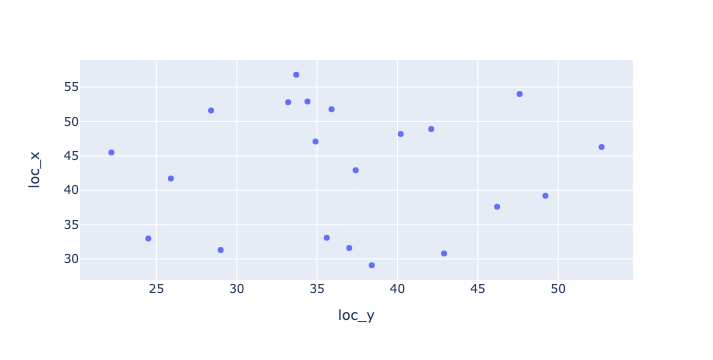

In [ ]:
fig = px.scatter(shots, x='loc_y', y='loc_x')

fig.show()

## Customizing Figures

The figure above is a barebones scatter plot, which in many cases is entirely adequate. In order to create the scatter plot, we need to pass the data source (the `shots` Data Frame), as well as the columns that will be used as x and y coordinates.

In this case, we also choose to assign the figure to a variable rather than display it immediately. We assign the figure to the variable `fig` (you might notice that I am not much good at creative naming...), and we then use the line `fig.show()` when we are ready to create the visualization.

As we look at this figure, we should notice that our figure is actually pretty hard to read as a graph of shots in a football match. `loc_y` is the lateral position on the field (yards from one sideline), and `loc_x` is the vertical position on the field (or distance from midfield). Perhaps we should rescale our shot map?

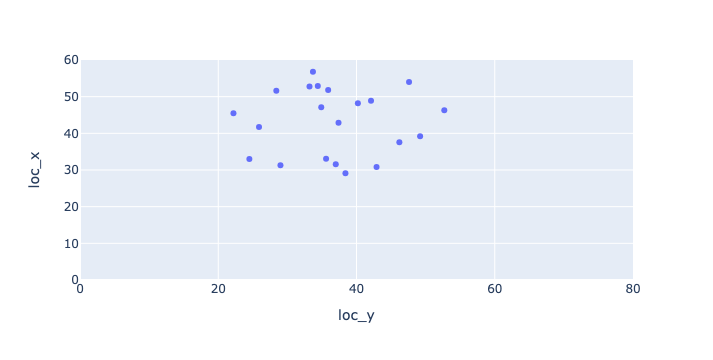

In [ ]:
fig = px.scatter(shots, x='loc_y', y='loc_x', range_x=[0,80], range_y=[0,60])

fig.show()

As we can see from the new figure, it looks more like half of a football pitch! We used the `range_x` and `range_y` arguments to force our figure to match what we want to visualize: a half pitch that is 80 yards in width and 60 in length (the approximate dimensions of one half of a football pitch). Now, each point will be mapped on this updated canvas, so that we can see that shots tend to happen in a cluster around the goal. Since shots are intended to go INTO the goal, this seems reasonable.

There are still a few shortcomings in our figure, though. Which team made which shots? Which shots were on target? Which were saved? It is time to add a few more features to complete our scatter plot:

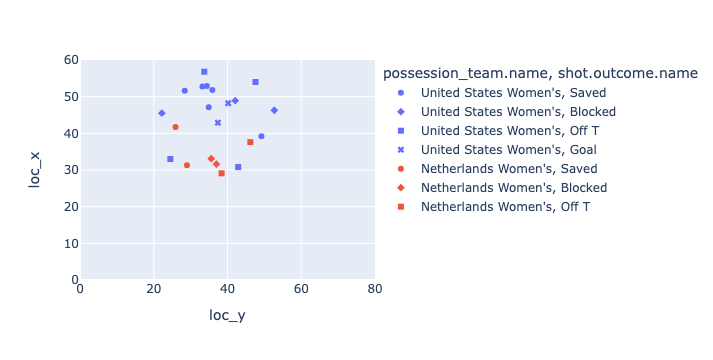

In [ ]:
fig = px.scatter(shots, x='loc_y', y='loc_x', color='possession_team.name', symbol='shot.outcome.name',
          range_x=[0,80], range_y=[0,60])

fig.show()

In this plot, we have made use of the `color` and `symbol` arguments. `color` is assigned the team name values, and `symbol` is assigned the outcome of the shot (saved, blocked, off target, goal), so that we can see where different kinds of shots occurred.

In this figure, it becomes clear that the Netherlands took more shots from a greater distance from the goal, and we can also observe that each team made several shots that were off target, while the rest required work from the defense to prevent scoring. This is a very helpful plot, but one final touch will make it particularly valuable: what if we could lay our plot on top of a figure of a soccer pitch?

It turns out that we can!

In [5]:
fig.add_layout_image(
        dict(
            source="https://johnburnmurdoch.github.io/football-pitch-tracker/half-rotate.png",
            xref="x", # pointing our image to the axes in our figure
            yref="y",
            x=0, # starting x position (from left to right)
            y=60, # starting y position (from bottom to top)
            sizex=80, # how far to go in x direction
            sizey=60, # how far to go in y direction
            sizing="stretch",
            opacity=0.5, # how solid the image should be
            layer="below") # put the image above or below the plot
)

# Set templates
fig.update_layout(template="simple_white")

fig.show()

NameError: name 'fig' is not defined

This is a bit more involved than our basic plotting function, but it really pays off to see shots overlaid on an actual pitch! In order to add an image as background to a plot, we use the `add_layout_image` method on our `fig` object (this is why we needed to store it as a variable!). We provide the source image (could be a local file, but we use one that I found on the internet in this example), and then we point to our x and y axes.

Next, we have to describe how big the image should be. This is helpful because we could add a watermark to a figure, or we could add a full background image as we will in this example. We need to provide the coordinates for where we want the top-left corner of the image to be placed. This is not measured in pixels, but in units on our graph. Because we want it to start at the top-left corner of our plot, we provide `x=0` and `y=60` as our arguments.

In order to make the plot the correct size, we state how many units (again, not pixels but instead units on the plot) we want to stretch our figure in each direction. We want to fill the figure, so we provide `sizex=80` and `sizey=60`. We ask that our figure be stretched to fit, so that it is not cropped or left blank if the canvas does not match the image size. Opacity can be used to make a figure more or less transparent (helpful for watermarks!), and we place it below the actual plot, so that it does not mask our scatter plot.

One last change to make the best use of our figure: we update the template of our plot to get rid of grid lines and other in-plot decoration using the `fig.update_layout(template="simple_white")` line. Then, our plot is ready for us!

We can still do more, though, to [refine our visual](https://plotly.com/python/styling-plotly-express/). We can change the names of axes to be more clear, or to remove axis labels entirely. We can add a title to the figure, and we can format the frequency of marks on the axes. Let's get rid of our axis labels and tick marks, and add a title to our figure:

/tmp/ipykernel_295/2519715419.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_295/2519715419.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



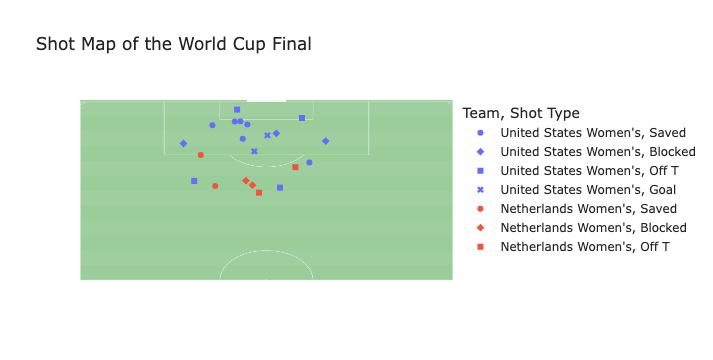

In [ ]:
import plotly.express as px
import pandas as pd
import requests, json

# Import data about the Women's World Cup Final match
data = pd.json_normalize(json.loads(requests.get("https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/69321.json").text))
# Choosing a few columns to keep
data = data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration',
 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id',
 'play_pattern.name', 'team.id', 'team.name', 'location', 'player.id', 'player.name', "shot.outcome.name"]]

shots = data[data['shot.outcome.name'].notnull()]

shots['loc_x'] = [(x[0]-60) for x in shots['location']]
shots['loc_y'] = [x[1] for x in shots['location']]

# Create the plot
fig = px.scatter(shots, x='loc_y', y='loc_x', color='possession_team.name', symbol='shot.outcome.name',
          range_x=[0,80], range_y=[0,60],
                title="Shot Map of the World Cup Final",
                labels = {
                    'possession_team.name' : "Team",
                    'shot.outcome.name': "Shot Type"
                })

# Set templates
fig.update_layout(template="simple_white")

# Add background
fig.add_layout_image(
            source="https://johnburnmurdoch.github.io/football-pitch-tracker/half-rotate.png",
            xref="x", # pointing our image to the axes in our figure
            yref="y",
            x=0, # starting x position (from left to right)
            y=60, # starting y position (from bottom to top)
            sizex=80, # how far to go in x direction
            sizey=60, # how far to go in y direction
            sizing="stretch",
            opacity=0.5, # how solid the image should be
            layer="below" # put the image above or below the plot
)


# Hide axes
fig.update_xaxes(visible=False) # Can also use title_text=None AND/OR showticklabels=False
fig.update_yaxes(visible=False)

# Render plot
fig.show()

In the figure above, we made several changes. First, we added a `title` argument to the figure. Next, we used a dictionary to rename our variables to be human-readable rather than easy-to-code:

In [ ]:
labels = {
            'possession_team.name' : "Team",
            'shot.outcome.name': "Shot Type"
                }

Each key-value pair should have a key corresponding to a column name, with a value that corresponds to the desired label. This allows us to easily track and change labels as we update our plot.

Finally, we use the lines `fig.update_xaxes(visible=False)` and `fig.update_yaxes(visible=False)` to hide our axes, since we do not need them in order to understand this particular visual. We could use those functions to format axes rather than to hide them if we so choose. Instructions for doing so are available [here](https://plotly.com/python/axes/).

While `plotly.express` provides very rapid development of an initial visual, the `plotly` library as a whole allows for deep customization of the final figure, so that we can easily transition from exploratory visualization to complex and highly modified figures that are ready for publication or presentation.

## Maps in Plotly

Not only can we create traditional figures such as bar charts and scatter plots, `plotly` also allows us to create robust maps using a simple interface. Let's try to map per capita GDP from our bar charts, in order to better understand geographic trends in the data:

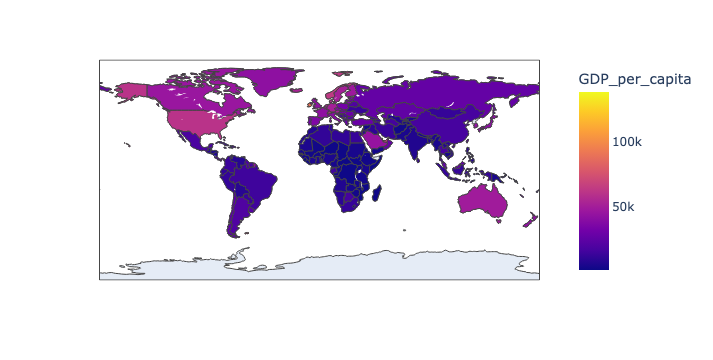

In [ ]:
# Import statements
import re
import requests
import pandas as pd

# Import our plotting library
import plotly.express as px

# Grab and clean the data
url = "https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison"
data = pd.read_html(url)[0]
data.columns = ['rank','country', 'GDP_per_capita', 'date']
data['GDP_per_capita'] = [int(i.replace('$','').replace(',','')) for i in data['GDP_per_capita']]

# Create the map
px.choropleth(data, locations='country', locationmode = "country names", color='GDP_per_capita')

To make a map, we simply provide the data, columns for location and color, and the `locationmode` to tell `plotly` what kind of map to make. In this case, we have country data and income levels, so we provide those, and indicate that our locations are country names rather than country codes. `plotly` does the rest by generating a map for us.

We don't have to stick with a single projection, though.

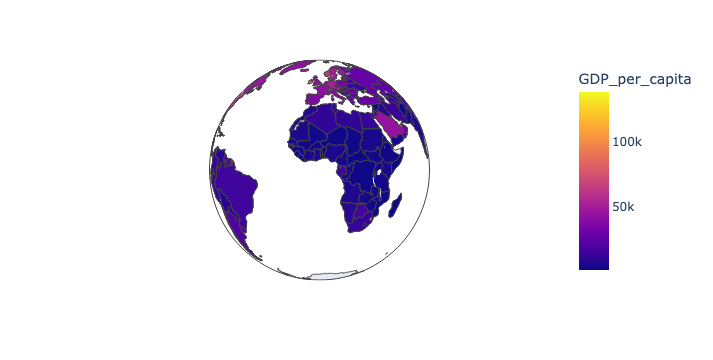

In [ ]:
# Create the map
px.choropleth(data, locations='country', locationmode = "country names", color='GDP_per_capita', projection='orthographic')

As can be seen above, the `projection` argument can be used to change between traditional flat map formats and other projections of spheres. Because `plotly` supports dynamic plots, these figures can then be rotated to view various parts of the globe.

On another note, what if we want to make a map of a single continent?

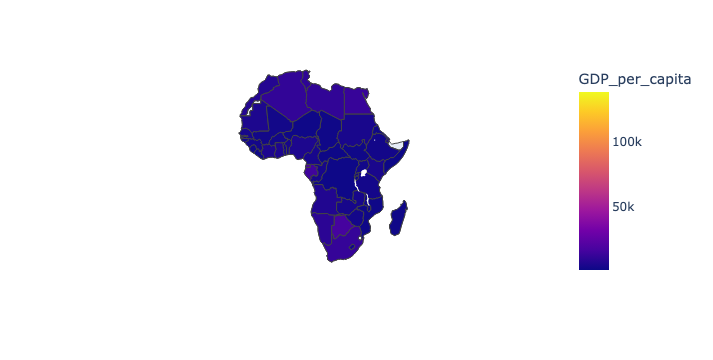

In [ ]:
# Create the map
px.choropleth(data, locations='country', locationmode = "country names", color='GDP_per_capita', scope="africa")

All we need to provide is the `scope` argument to limit our figure to the region of interest. But mapping Africa just shows us how inadequate our color scale is. We know that many poor countries will be difficult to distinguish unless we change colors rapidly at very low values:

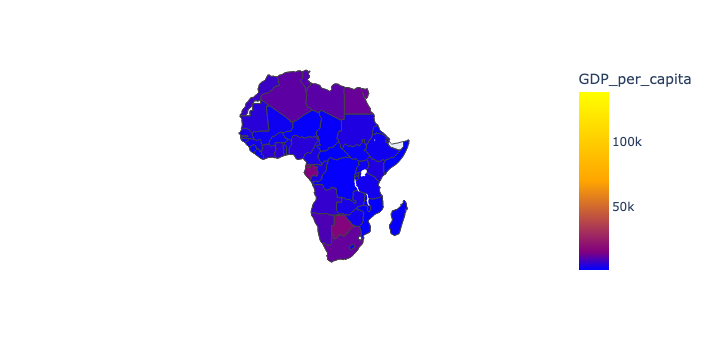

In [ ]:
# Create the map
px.choropleth(data, locations='country', locationmode = "country names", color='GDP_per_capita',
              color_continuous_scale=[(0, "blue"), (0.1, "purple"), (0.5, "orange"), (1, "yellow")],
              scope="africa")

In the figure above, we use the argument `color_continuous_scale` to specify the color at various percentiles within our figure. We provide a list of tuples, with each tuple pairing a number between 0 and 1 to a color. `plotly` then uses those colors and ranges to create the color scale for our figure.

We are not even limited to choropleth maps. We can also create geographic scatter plots:

Another neat feature is the ability to map at finer levels using mapbox to create street-level maps for highly detailed plots at nearly any level. To learn more about these features, please [read the docs](https://plotly.com/python/plotly-express/#maps), and sign up for a MapBox account.

### Solve it:

In the cells below (labeled `#si-figure-1`, `#si-figure-2`, `#si-figure-3`, respectively), write code that will import one of the data sources used in this class so far, and create three distinct plots that explain points of interest in that data source. Be sure to format the plots appropriately for the purpose of each graph!

Note: This assignment will be manually graded, so you won't be able to see your score when you commit your code back to GitHub. If you create three working and thoughtful plots using the `plotly`/`plotly_express` libraries, you will receive full credit. For each figure, you will receive 1 point for a working plot, and 1 point for appropriate formatting (labels, colors, etc.).

In [26]:
#si-figure-1
import pandas as pd
import plotly.express as px

# Identify and clean the data
url = "https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison"
data = pd.read_html(url)[0]

# Clean and preprocess the data
data.columns = ['rank', 'country', 'GDP_per_capita', 'date']
data['GDP_per_capita'] = data['GDP_per_capita'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Step 2: Create map
fig = px.choropleth(data,
                    locations="country",
                    locationmode="country names",
                    color="GDP_per_capita",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'GDP_per_capita': 'GDP per Capita (USD)'},
                    title="GDP per Capita by Country (CIA World Factbook)"
                   )

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.show()



In [29]:
#si-figure-2
import requests
import pandas as pd
import plotly.express as px

url = "https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison"
data = pd.read_html(url)[0]

data.columns = ['rank', 'country', 'GDP_per_capita', 'date']
data['GDP_per_capita'] = [int(i.replace('$', '').replace(',', '')) for i in data['GDP_per_capita']]

continent_data = {
    'country': ['Finland', 'Uruguay', 'USA', 'Japan', 'Brazil', 'Canada', 'Germany', 'China', 'India', 'Mexico'],
    'continent': ['Europe', 'South America', 'North America', 'Asia', 'South America', 'North America', 'Europe', 'Asia', 'Asia', 'North America']
}

continent_df = pd.DataFrame(continent_data)

merged_data = pd.merge(data[['country', 'GDP_per_capita']], continent_df, on='country')

continent_gdp = merged_data.groupby('continent')['GDP_per_capita'].mean().reset_index()

fig = px.bar(continent_gdp,
             x='continent',
             y='GDP_per_capita',
             color='continent',
             title='Average GDP per Capita by Continent',
             labels={"GDP_per_capita": "Average GDP per Capita (USD)", "continent": "Continent"},
             template="plotly_dark")

fig.show()


In [20]:
#si-figure-3
# Import libraries
import requests
import pandas as pd
import plotly.express as px

#Grab and clean the data
url = "https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison"
data = pd.read_html(url)[0]

# Clean data
data.columns = ['rank', 'country', 'GDP_per_capita', 'date']
data['GDP_per_capita'] = [int(i.replace('$', '').replace(',', '')) for i in data['GDP_per_capita']]

# Clean data, double check
print(data.head())

top_20_countries = data.head(20)

fig = px.bar(
    top_20_countries,
    x='country',
    y='GDP_per_capita',
    color='country',
    title="Top 20 Countries by GDP per Capita",
    labels={"GDP_per_capita": "GDP per Capita (USD)", "country": "Country"},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.show()



   rank     country  GDP_per_capita       date
0     1  Luxembourg          132400  2023 est.
1     2   Singapore          127500  2023 est.
2     3      Monaco          115700  2015 est.
3     4     Ireland          115600  2023 est.
4     5       Qatar          113200  2022 est.
